In [33]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [34]:
raw=pd.read_csv('Ruppert Dataset/USMacroG.csv')

In [35]:
rawdata=raw-raw.shift()
rawdata.dropna(inplace=True)
data=rawdata[['consumption','dpi','cpi','government','unemp']]


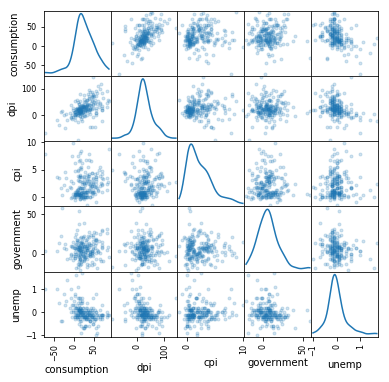

In [36]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline  
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde');

In [5]:

#model=ols(y=data.consumption,x=data[['cons','dpi','cpi','government','unemp']]).fit()
model=ols('consumption~dpi+cpi+government+unemp',data=data)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     25.23
Date:                Wed, 19 Apr 2017   Prob (F-statistic):           6.99e-17
Time:                        12:47:34   Log-Likelihood:                -893.52
No. Observations:                 202   AIC:                             1797.
Df Residuals:                     197   BIC:                             1814.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     14.8945      2.547      5.847      0.000         9.871    19.918
dpi            0.3504      0.048      7.230      0.000         0.255     0.446
cpi            0.7167      0.681      1.053      0.294        -0.625     2.059
government    -0.0037      0.118     -0.031      0.975        -0.237     0.230
unemp        -16.5930      3.922     -4.231      0.000       -24.327    -8.859
==============================================================================
Omnibus:                        9.689   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.523
Skew:                           0.378   Prob(JB):                      0.00315
Kurtosis:                       3.893   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
table = sm.stats.anova_lm(result,typ=2)

In [8]:
print(table)

                  sum_sq     df          F        PR(>F)
dpi         21814.450795    1.0  52.271271  1.042792e-11
cpi           462.787488    1.0   1.108920  2.936066e-01
government      0.414016    1.0   0.000992  9.749052e-01
unemp        7470.597347    1.0  17.900869  3.563849e-05
Residual    82214.316158  197.0        NaN           NaN


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variance_inflation_factor(model.exog,4)

1.1390824282465015

In [15]:
import pandas as pd
import numpy as np
x=pd.DataFrame(index=range(1,31))
x['x']=np.arange(1.0,15,14/30)
x['x2']=x.x**2


In [27]:
np.corrcoef(x.x,x.x2)

array([[ 1.        ,  0.97408628],
       [ 0.97408628,  1.        ]])

In [24]:
new_model=ols('x~x2',data=x).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     519.3
Date:                Sat, 22 Apr 2017   Prob (F-statistic):           1.29e-19
Time:                        15:01:11   Log-Likelihood:                -39.856
No. Observations:                  30   AIC:                             83.71
Df Residuals:                      28   BIC:                             86.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.0854      0.268     11.498      0.000         2.536     3.635
x2             0.0611      0.003     22.789      0.000         0.056     0.067
==============================================================================
Omnibus:                        3.459   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                3.064
Skew:                          -0.715   Prob(JB):                        0.216
Kurtosis:                       2.363   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
new_model=ols('x2~x',data=x).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     x2   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     519.3
Date:                Sat, 22 Apr 2017   Prob (F-statistic):           1.29e-19
Time:                        15:01:22   Log-Likelihood:                -122.93
No. Observations:                  30   AIC:                             249.9
Df Residuals:                      28   BIC:                             252.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -44.0059      5.967     -7.375      0.000       -56.229   -31.783
x             15.5333      0.682     22.789      0.000        14.137    16.930
==============================================================================
Omnibus:                        3.947   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                2.960
Skew:                           0.629   Prob(JB):                        0.228
Kurtosis:                       2.114   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
x['xbar']=x.x-x.x.mean()
x['x2bar']=x.xbar**2
np.corrcoef(x.xbar,x.x2bar)

array([[  1.00000000e+00,   4.80604116e-16],
       [  4.80604116e-16,   1.00000000e+00]])

In [32]:
model=ols('x2bar~xbar',data=x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  x2bar   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sat, 22 Apr 2017   Prob (F-statistic):               1.00
Time:                        15:11:37   Log-Likelihood:                -122.93
No. Observations:                  30   AIC:                             249.9
Df Residuals:                      28   BIC:                             252.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     16.3152      2.753      5.926      0.000        10.676    21.955
xbar        1.943e-15      0.682   2.85e-15      1.000        -1.396     1.396
==============================================================================
Omnibus:                        3.947   Durbin-Watson:                   0.060
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                2.960
Skew:                           0.629   Prob(JB):                        0.228
Kurtosis:                       2.114   Cond. No.                         4.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""